In [1]:
from qiskit import *
from qiskit.visualization import *
%matplotlib inline

## Deutsch Algorithm

This algorithm is is a quantum algorithm that determines whether a given function f(x) (which takes a single bit as input and returns either 0 or 1) is constant (same output for both inputs) or balanced (different outputs for each input) using just one function evaluation. It leverages superposition and interference to evaluate both inputs (0 and 1) simultaneously, unlike classical methods, which require two evaluations.

In [3]:
circuit=QuantumCircuit(2,1)

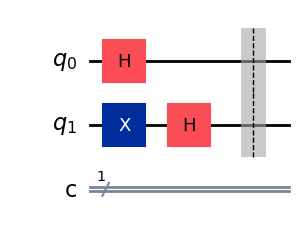

In [5]:
circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.barrier()
circuit.draw(output="mpl")

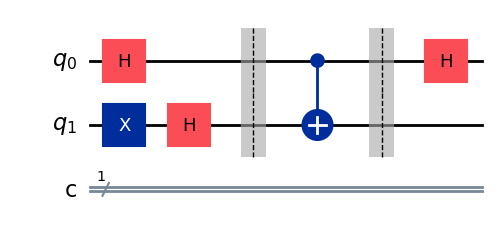

In [7]:
circuit.cx(0,1)
circuit.barrier()
circuit.h(0)
circuit.barrier()
circuit.draw(output="mpl")

In [9]:
circuit.measure(0,0)

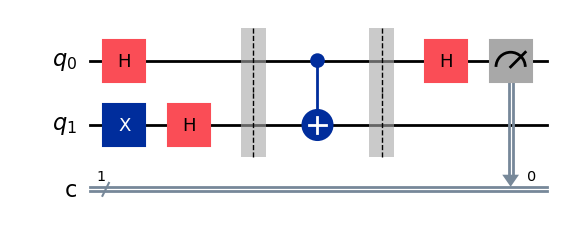

In [11]:
circuit.draw(output="mpl")

In [13]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit_aer.backends import AerSimulator

In [15]:
qasm_simulator = AerSimulator()

In [17]:
measured_circuit = transpile(circuit, qasm_simulator)

In [19]:
qasm_job = qasm_simulator.run(measured_circuit, shots=1024)

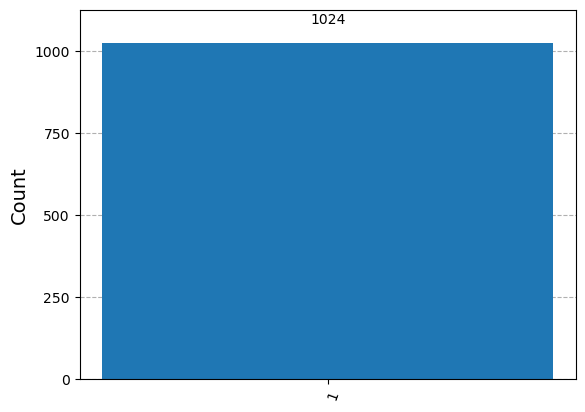

In [23]:
counts = qasm_job.result().get_counts()
plot_histogram(counts)